In [7]:
using ITensors, ITensorMPS, Optim, LinearAlgebra, Printf, Random, Plots, DelimitedFiles
Random.seed!(123)
include("src/QuantumResource1D.jl")
include("src/HL_module.jl")

Main.HL1D

In [8]:
N = 5
g_values = range(-1.0, 1.0, 10)
all_params, all_costs, all_qr = [], [], []
all_X_exp, all_O_exp, all_ZZ_exp = [], [], []
fidelity_ghz_vals, fidelity_cluster_vals = [], []

for g in g_values
    println("\n=== g = $g ===")

    qr_g = QR1D.QuantumResource1D(N)
    GHZ_wf, params_GHZ, name_GHZ = QR1D.generate_GHZ_state(qr_g)
    cluster_wf, params_cluster, name_cluster = QR1D.generate_cluster_state(qr_g)
    QR1D.AddQR(qr_g, GHZ_wf, params_GHZ, name_GHZ)
    QR1D.AddQR(qr_g, cluster_wf, params_cluster, name_cluster);

    θ_g, cost_g = QR1D.optimize_circuit_QR(qr_g, g)
    psi_g = QR1D.apply_ladder_circuit(qr_g, θ_g)

    push!(all_params, θ_g)
    push!(all_costs, cost_g)
    push!(all_qr, qr_g)
    push!(all_X_exp, real(inner(psi_g', qr_g.aux_ops[1], psi_g)))
    push!(all_O_exp, real(inner(psi_g', qr_g.aux_ops[2], psi_g)))
    push!(all_ZZ_exp, real(inner(psi_g', qr_g.aux_ops[3], psi_g)))
    push!(fidelity_ghz_vals, abs2(inner(psi_g, GHZ_wf)))
    push!(fidelity_cluster_vals, abs2(inner(psi_g, cluster_wf)))
end


all_params_mat = hcat(all_params...)
writedlm("DATA/all_params_mat.txt", all_params_mat)
writedlm("DATA/g_values.txt", collect(g_values))
writedlm("DATA/fidelity_ghz_vals.txt", fidelity_ghz_vals)
writedlm("DATA/fidelity_cluster_vals.txt", fidelity_cluster_vals)
writedlm("DATA/X_exp.txt", all_X_exp)
writedlm("DATA/O_exp.txt", all_O_exp)
writedlm("DATA/ZZ_exp.txt", all_ZZ_exp)
writedlm("DATA/cost_values.txt", all_costs)


=== g = -1.0 ===
Fidelity wrt to GHZ = 1.0
Fidelity wrt to cluster state = 1.0
Optimizing for g = -1.0...
Iter     Function value   Gradient norm 
     0     1.917353e-32     1.167199e-11
 * time: 0.00011515617370605469
Optimizing for g = -1.0...
Iter     Function value   Gradient norm 
     0    -1.000000e+00     4.308552e-09
 * time: 5.2928924560546875e-5

=== g = -0.7777777777777778 ===
Fidelity wrt to GHZ = 1.0
Fidelity wrt to cluster state = 1.0
Optimizing for g = -0.7777777777777778...
Iter     Function value   Gradient norm 
     0    -1.111111e-01     9.167132e-12
 * time: 3.814697265625e-5
Optimizing for g = -0.7777777777777778...
Iter     Function value   Gradient norm 
     0    -8.888889e-01     2.142904e-01
 * time: 4.792213439941406e-5
     1    -8.918897e-01     1.578523e-01
 * time: 0.056764841079711914
     2    -8.940798e-01     8.764992e-02
 * time: 0.11166691780090332
     3    -8.941768e-01     8.056152e-02
 * time: 0.16538786888122559
     4    -8.944995e-01     

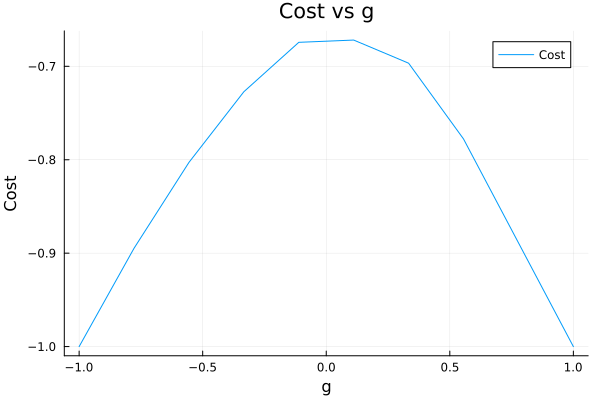

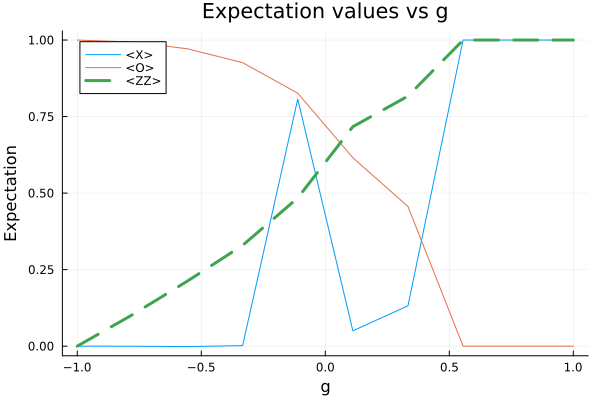

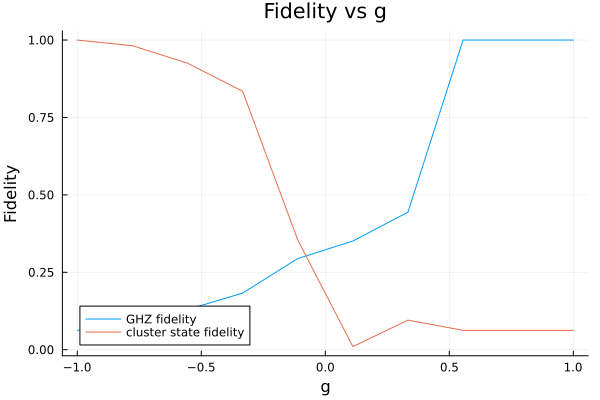

fidelity_ghz_vals = Any[0.062499999836197986, 0.0911456527095585, 0.12978848500975557, 0.18288170269571044, 0.29443386675657207, 0.3510348225983853, 0.4444026042455398, 0.9999999999999989, 0.9999999999999989, 0.9999999999999989]
fidelity_cluster_vals = Any[0.9999999999999997, 0.9816786273904626, 0.925319783240847, 0.8346917294417173, 0.35476852400815634, 0.010083878791483097, 0.09567744669733817, 0.06249999999999993, 0.06249999999999993, 0.06249999999999993]


10-element Vector{Any}:
 0.9999999999999997
 0.9816786273904626
 0.925319783240847
 0.8346917294417173
 0.35476852400815634
 0.010083878791483097
 0.09567744669733817
 0.06249999999999993
 0.06249999999999993
 0.06249999999999993

In [9]:
p1 = plot(g_values, all_costs, label="Cost", title="Cost vs g", xlabel="g", ylabel="Cost");
p2 = plot(g_values, all_X_exp, label="<X>", title="Expectation values vs g", xlabel="g", ylabel="Expectation",linewidth=1);
plot!(p2, g_values, all_O_exp, label="<O>",linewidth=1);
plot!(p2, g_values, all_ZZ_exp / (N - 1), label="<ZZ>",linestyle=:dash,linewidth=3);

p3 = plot(g_values, fidelity_ghz_vals, label="GHZ fidelity", title="Fidelity vs g", xlabel="g", ylabel="Fidelity");
plot!(p3, g_values, fidelity_cluster_vals, label="cluster state fidelity");

display(p1)
display(p2)
display(p3)

@show fidelity_ghz_vals
@show fidelity_cluster_vals